<a href="https://colab.research.google.com/github/RizkyFitriAndini/PCVK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

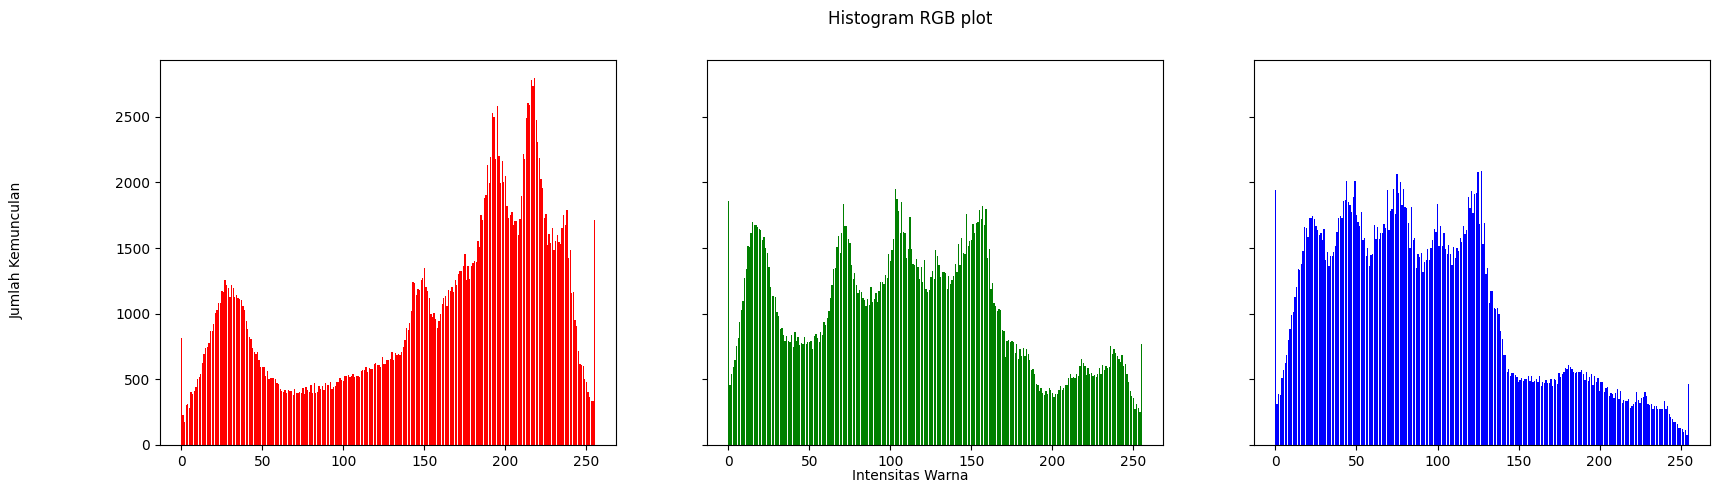

In [5]:
img = cv.imread('/content/drive/MyDrive/PCVK/Assets/Assets/lena.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)


height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue,color='blue')

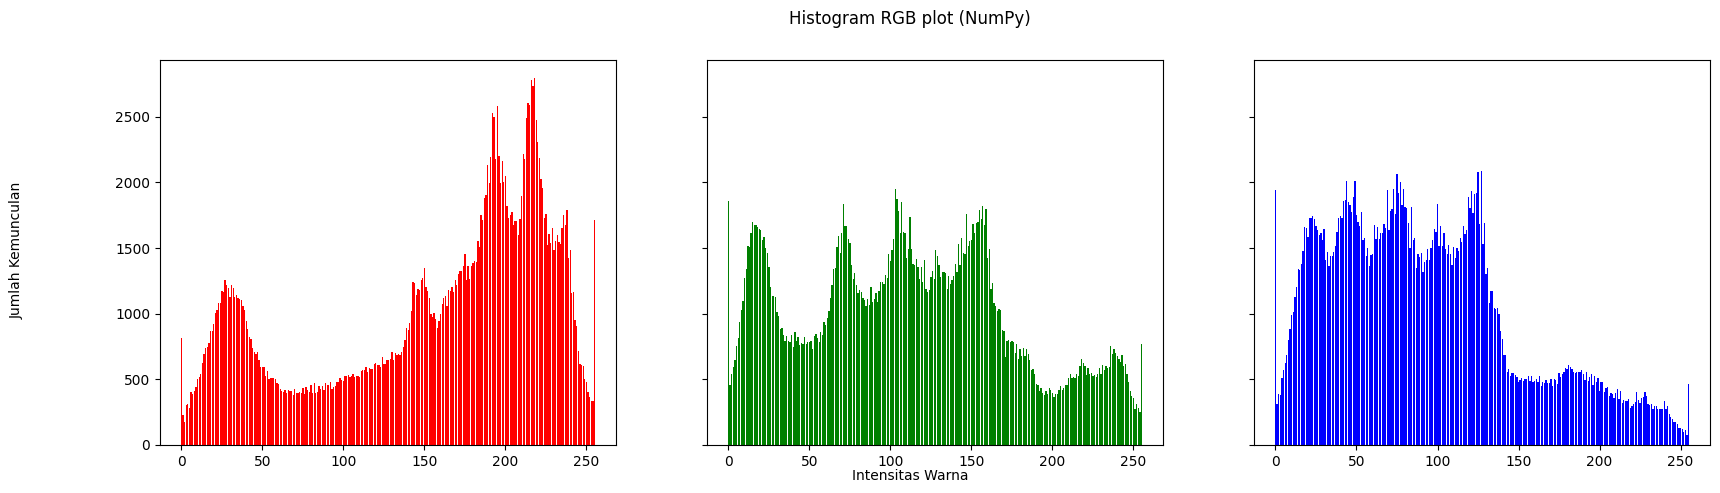

In [6]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

red_hist, _ = np.histogram(img_rgb[:, :, 0], bins=256, range=(0, 256))
green_hist, _ = np.histogram(img_rgb[:, :, 1], bins=256, range=(0, 256))
blue_hist, _ = np.histogram(img_rgb[:, :, 2], bins=256, range=(0, 256))

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot (NumPy)')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red_hist, color='red')
axs[1].bar(names, green_hist, color='green')
axs[2].bar(names, blue_hist, color='blue')
plt.show()

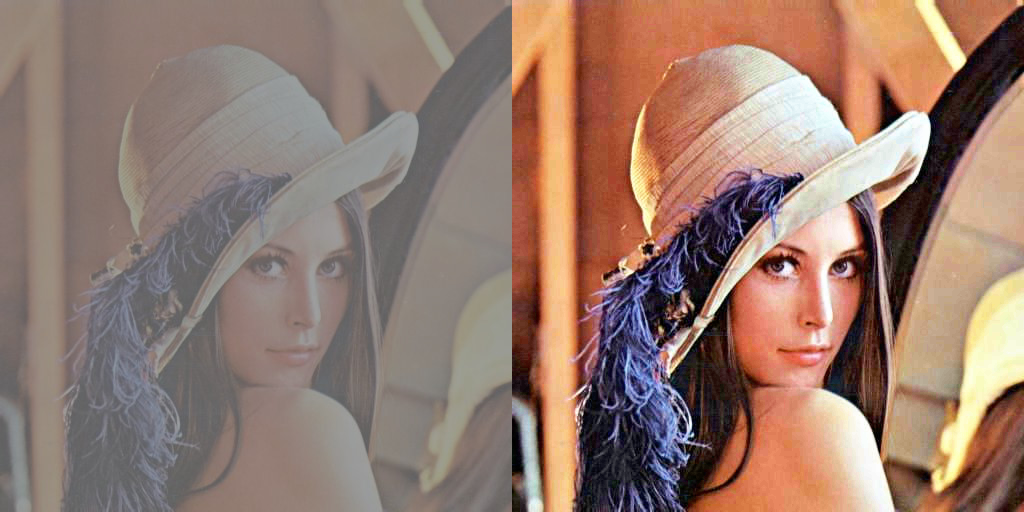

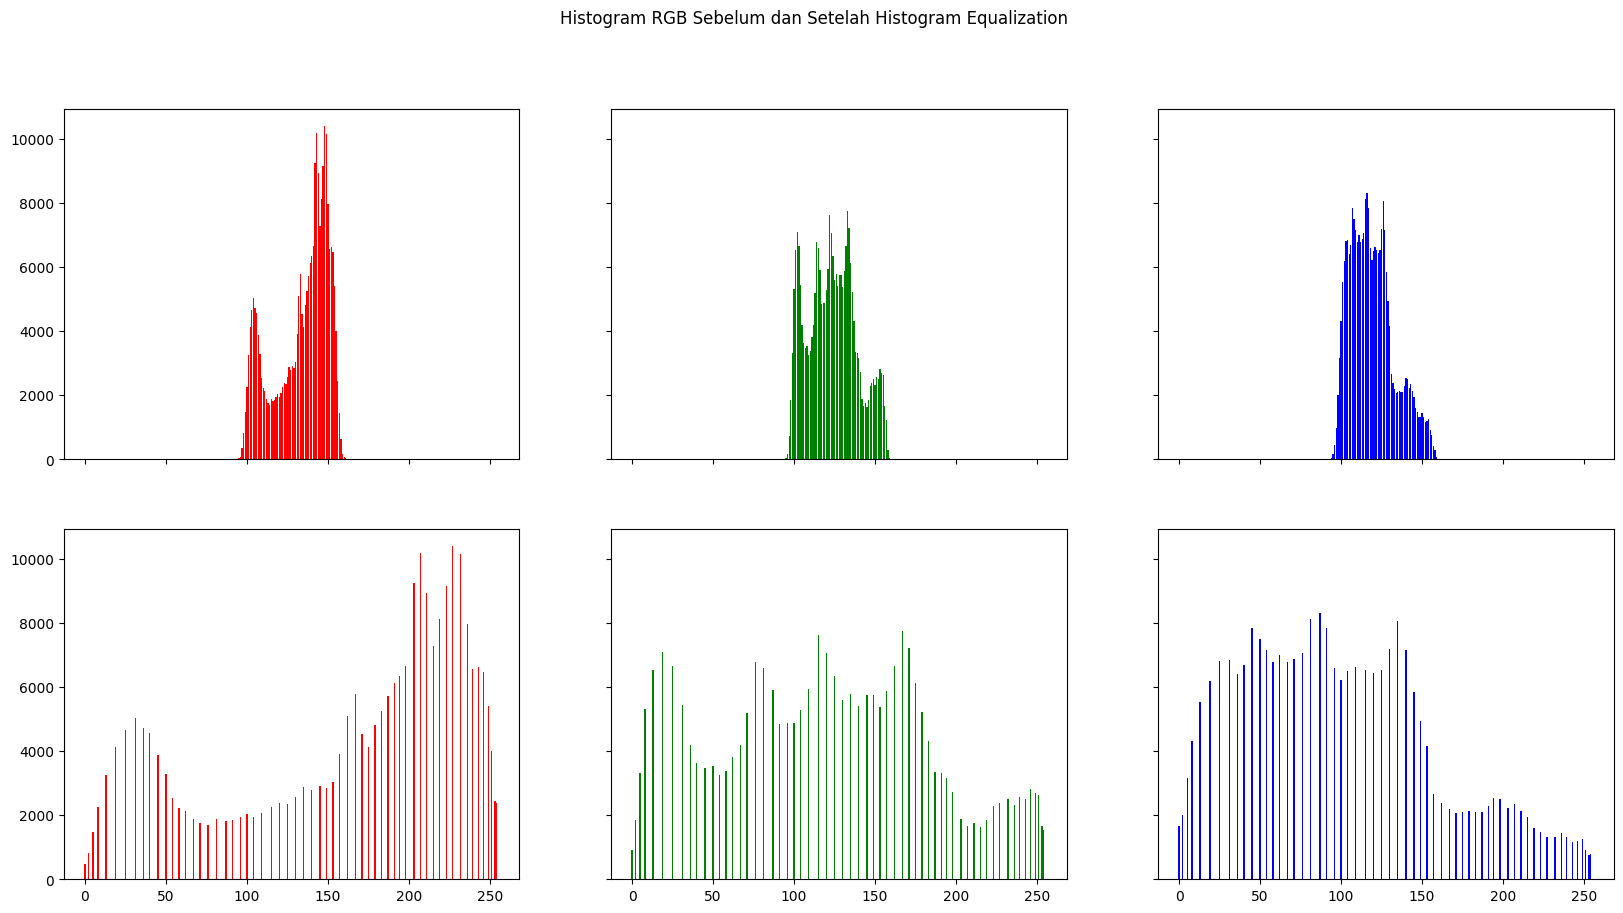

In [18]:
img = cv.imread('/content/drive/MyDrive/PCVK/Assets/Assets/lena_lc.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Mendapatkan ukuran gambar
height, width, _ = img_rgb.shape
def histog(img):
    height, width, depth = np.shape(img)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img[y][x][0]] += 1  # Blue channel
            ax[1][img[y][x][1]] += 1  # Green channel
            ax[2][img[y][x][2]] += 1  # Red channel
    return ax

# Calculate the original histogram
histo_asli = histog(img)

# Convert to Numpy array
img_array = np.asarray(img)

# Step 1: Normalized cumulative histogram
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

# Normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

# Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Step 3: Transformation
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]

# Reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img_eq = eq_img_array

# Compute equalized histogram
equal_histo = histog(img_eq)

# Concatenate images for comparison
final_frame = cv.hconcat((img, img_eq))
cv2_imshow(final_frame)

# Plot histogram RGB sebelum dan sesudah equalization
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20, 10], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Sebelum dan Setelah Histogram Equalization')

# Histogram sebelum equalization
axs[0, 0].bar(names, histo_asli[2], color='red')
axs[0, 1].bar(names, histo_asli[1], color='green')
axs[0, 2].bar(names, histo_asli[0], color='blue')

# Histogram setelah equalization
axs[1, 0].bar(names, equal_histo[2], color='red')
axs[1, 1].bar(names, equal_histo[1], color='green')
axs[1, 2].bar(names, equal_histo[0], color='blue')

plt.show()

In [22]:
img = cv.imread('/content/drive/MyDrive/PCVK/Assets/Assets/lena_lc.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Histogram equalization using equalizeHist
img_eq_cv2 = cv.equalizeHist(img_rgb)

# Function to calculate histogram
def histog(img):
    height, width, depth = np.shape(img) if len(img.shape) == 3 else (img.shape[0], img.shape[1], 1)
    ax = np.zeros((3, 256)) if depth == 3 else np.zeros((1, 256))

    for y in range(height):
        for x in range(width):
            if depth == 3:
                ax[0][img[y][x][0]] += 1  # Blue channel
                ax[1][img[y][x][1]] += 1  # Green channel
                ax[2][img[y][x][2]] += 1  # Red channel
            else:
                ax[0][img[y][x]] += 1  # Grayscale channel
    return ax

# Calculate the original histogram
histo_asli = histog(img)

# Calculate the histogram of the cv2 equalized image
histo_cv2 = histog(img_eq_cv2)

# Concatenate images for comparison
final_frame = cv.hconcat((img, img_eq_cv2))
cv2_imshow(final_frame)

# Plot histograms
names = np.arange(256)
fig, axs = plt.subplots(2, 2, figsize=[15, 10], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Sebelum dan Setelah Histogram Equalization')

# Histogram asli
axs[0, 0].bar(names, histo_asli[0], color='gray')
axs[0, 0].set_title('Histogram Asli')

# Histogram setelah equalization (manual)
axs[0, 1].bar(names, histo_cv2[0], color='gray')
axs[0, 1].set_title('Histogram CV2 Equalized')

# Histogram setelah equalization (manual)
axs[1, 0].bar(names, histo_asli[0], color='gray')
axs[1, 0].set_title('Histogram Equalization Manual')

# Histogram cv2 equalized
axs[1, 1].bar(names, histo_cv2[0], color='gray')
axs[1, 1].set_title('Histogram Equalization CV2')

plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'equalizeHist'
